<a href="https://colab.research.google.com/github/sling1678/ML_programs_for_video_lectures/blob/main/prostate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prostate data info (Elements of Statistical Learning)

Predictors (columns 1--8)

lcavol
lweight
age
lbph
svi
lcp
gleason
pgg45

outcome (column 9)

lpsa

train/test indicator (column 10)

This last column indicates which 67 observations were used as the 
"training set" and which 30 as the test set, as described on page 48
in the book.

There was an error in these data in the first edition of this
book. Subject 32 had a value of 6.1 for lweight, which translates to a
449 gm prostate! The correct value is 44.9 gm. We are grateful to
Prof. Stephen W. Link for alerting us to this error.

The features must first be scaled to have mean zero and  variance 96 (=n)
before the analyses in Tables 3.1 and beyond.  That is, if x is the  96 by 8 matrix
of features, we compute xp <- scale(x,TRUE,TRUE)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

pd.set_option("display.precision", 2) # for disply
plt.rcParams['figure.figsize'] = (12.0, 9.0)


In [ ]:
# Dataframe for this project
DATA_URL = "https://hastie.su.domains/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(DATA_URL, sep='\t') 

TARGET = ['lpsa']
ALL_FEATURES = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
TRAINING_SET_SELECTION = ['train']
df = df[ALL_FEATURES + TARGET + TRAINING_SET_SELECTION] # this will drop fictitious columns that show up in the downloaded file

In [ ]:
df.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.58,2.77,50,-1.39,0,-1.39,6,0,-0.43,T
1,-0.99,3.32,58,-1.39,0,-1.39,6,0,-0.16,T
2,-0.51,2.69,74,-1.39,0,-1.39,7,20,-0.16,T
3,-1.20,3.28,58,-1.39,0,-1.39,6,0,-0.16,T
4,0.75,3.43,62,-1.39,0,-1.39,6,0,0.37,T


In [ ]:
df.isna().sum()

lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

In [ ]:
# Remove extra columns in the data 
def clean_df(df, dropcols=None):
  if dropcols is not None:
    for col in dropcols:
      if col in df.columns:
        df.drop(col, axis=1, inplace=True)
  return df  

def prepare_train_and_test_sets(df):
  # special for this dataset; datapoints to be used in training
  # are labeled in a separate calumn with letter 'T'
  train_col_name, train_value="train","T"
  train = df[df[train_col_name]==train_value].copy()
  train.drop(columns=[train_col_name], axis=1, inplace=True)
  train.reset_index(drop=True, inplace=True)

  test = df[df[train_col_name]!=train_value].copy()
  test.drop(columns=[train_col_name], axis=1, inplace=True)
  test.reset_index(drop=True, inplace=True)
  return train, test
#-------------------------------------------------------
train, test = prepare_train_and_test_sets(df)

print(f"full dataframe:\n{df.head(3)}")
print(f"train dataframe:\n{train.head(3)}")
print(f"test dataframe:\n{test.head(3)}")

full dataframe:
   lcavol  lweight  age  lbph  svi   lcp  gleason  pgg45  lpsa train
0   -0.58     2.77   50 -1.39    0 -1.39        6      0 -0.43     T
1   -0.99     3.32   58 -1.39    0 -1.39        6      0 -0.16     T
2   -0.51     2.69   74 -1.39    0 -1.39        7     20 -0.16     T
train dataframe:
   lcavol  lweight  age  lbph  svi   lcp  gleason  pgg45  lpsa
0   -0.58     2.77   50 -1.39    0 -1.39        6      0 -0.43
1   -0.99     3.32   58 -1.39    0 -1.39        6      0 -0.16
2   -0.51     2.69   74 -1.39    0 -1.39        7     20 -0.16
test dataframe:
   lcavol  lweight  age  lbph  svi   lcp  gleason  pgg45  lpsa
0    0.74     3.47   64  0.62    0 -1.39        6      0  0.77
1   -0.78     3.54   47 -1.39    0 -1.39        6      0  1.05
2    0.22     3.24   63 -1.39    0 -1.39        6      0  1.05


In [ ]:
# Preprocessing- here only normalizing the train and test datasets based on train
def preprocess_params(train, features):
  means = train[features].mean()
  stds = train[features].std()
  return means, stds
def preprocess(train, test, features):
  means, stds = preprocess_params(train, features)
  train[features] = (train[features]-means)/stds
  test[features] = (test[features]-means)/stds
  return train, test
#-------------------------------------------------------
train, test = preprocess(train, test, features=ALL_FEATURES)
print(f"Normalized train dataframe:\n{train.head(3)}")
print(f"Normalized test dataframe:\n{test.head(3)}")

Normalized train dataframe:
   lcavol  lweight   age  lbph   svi   lcp  gleason  pgg45  lpsa
0   -1.52    -1.80 -1.97  -1.0 -0.53 -0.84    -1.03  -0.90 -0.43
1   -1.86    -0.64 -0.90  -1.0 -0.53 -0.84    -1.03  -0.90 -0.16
2   -1.47    -1.96  1.23  -1.0 -0.53 -0.84     0.38  -0.21 -0.16
Normalized test dataframe:
   lcavol  lweight   age  lbph   svi   lcp  gleason  pgg45  lpsa
0   -0.46    -0.32 -0.10  0.37 -0.53 -0.84    -1.03   -0.9  0.77
1   -1.68    -0.18 -2.37 -1.00 -0.53 -0.84    -1.03   -0.9  1.05
2   -0.88    -0.80 -0.23 -1.00 -0.53 -0.84    -1.03   -0.9  1.05


In [ ]:
# Guessing the mean value of y from train dataset everytime will be the base error expected
def mean_square_error(actual, predicted):
  return np.mean(np.square(actual-predicted))

def trained_base_model(train, target):
  return np.mean(train[target])

#-------------------------------------------------------
base_guess = trained_base_model(train, 'lpsa')
base_error_training = mean_square_error(train['lpsa'], base_guess)
base_error_testing =  mean_square_error(test['lpsa'], base_guess)
print( f"base_error_training = {base_error_training:0.4f},\
  base_error_testing = {base_error_testing:0.4f}")

base_error_training = 1.4370,  base_error_testing = 1.0567


In [ ]:
# Now we introduce linear model as y = w0 + w1*x1+ w2*x2 + ... + w8*x8
def forward_pass(X, b, w):
  return b + X.dot(w) #OK

# for gradient descent
def gradients(X,y,b,w):
  num_examples = X.shape[0]
  yhat = np.array(forward_pass(X, b, w))
  db = np.zeros( (1,1) )
  # dw = np.zeros( )
  db[0,0] = np.sum(yhat-y)/num_examples 
  dw = np.sum((yhat - y) * X , axis=0) / num_examples
  dw = dw.reshape((X.shape[-1],1))
  return db, dw #OK

def training_step(X, y, b, w, learning_rate=0.001):
  db, dw = gradients(X,y,b,w)
  b = b - learning_rate * db
  w = w - learning_rate * dw 
  return b, w

def initialize_params(dims_w, dims_b=1):
  b = np.random.rand(dims_b, 1)
  w = np.random.rand(dims_w,1)
  return b, w

def evaluate_err(X,y, b,w):
  predicted = forward_pass(X, b, w)
  err = mean_square_error(y, predicted.reshape(y.shape))
  return err

def train_model(X, y, epochs, learning_rate=0.001, b=0, w=None):
  if w is None:
    b, w = initialize_params(X.shape[-1], 1)
  err=[]
  db, dw = gradients(X,y,b,w)
  
  model_params_by_epoch=[(b,w)]
  for epoch in range(epochs):
    b, w = training_step(X, y, b, w, learning_rate=learning_rate)
    err.append( evaluate_err(X,y,b,w) )
    model_params_by_epoch.append((b.ravel(),w.ravel()))
  return model_params_by_epoch, err



Trained model: b = [2.45224395], w = [0.77955597 0.35221332]
train_err = 0.5536, test_err = 0.4926
base_error_training = 1.4370,        base_error_testing = 1.0567


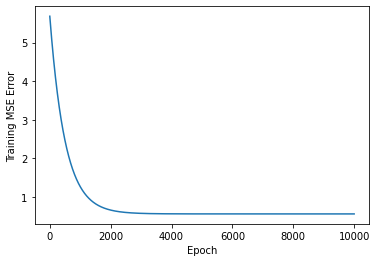

[2.45224395] [0.77955597 0.35221332]


In [ ]:
def run_simulation(train, features, target, test=None, epochs=100, verbose=True, plotting=True):
  X = train[features].values
  y = train[target].values
  # Train
  b, w = initialize_params(len(features), 1)
  model_params_by_epoch, err = train_model(X, y, epochs=epochs, learning_rate=0.001, b=b, w=w)
  final_b = model_params_by_epoch[-1][0]
  final_w = model_params_by_epoch[-1][1]
  # Evaluate
  train_err = evaluate_err(X,y,final_b, final_w)
  if test is not None:
    X_test = test[features].values
    y_test = test[target].values
    test_err = evaluate_err(X_test, y_test, final_b, final_w)
  # printout
  if verbose:
    print(f"Trained model: b = {final_b.ravel()}, w = {final_w.ravel()}")
    if test is not None:
      base_guess = trained_base_model(train, 'lpsa')
      base_error_training = mean_square_error(train['lpsa'], base_guess)
      base_error_testing =  mean_square_error(test['lpsa'], base_guess)
      print(f"train_err = {train_err:0.4f}, test_err = {test_err:0.4f}")
      print( f"base_error_training = {base_error_training:0.4f},\
        base_error_testing = {base_error_testing:0.4f}")
  if plotting:
    # plot
    epochs_idx=np.arange(len(err)) + 1
    fig, ax = plt.subplots(1,1)
    ax.plot(epochs_idx, err)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Training MSE Error")
    plt.show()
  return final_b, final_w

features=['lcavol', 'lweight']
target=['lpsa']
final_b, final_w = run_simulation(train, features, target, test, epochs=10000, verbose=True)
print(final_b, final_w)


Trained model: b = [2.45224507], w = [0.88549715]
train_err = 0.6646, test_err = 0.4797
base_error_training = 1.4370,        base_error_testing = 1.0567


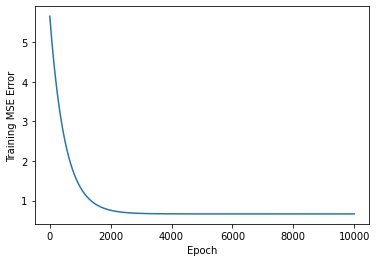

[2.45224507] [0.88549715]


In [ ]:
features=['lcavol']
target=['lpsa']
final_b, final_w = run_simulation(train, features, target, test, epochs=10000, verbose=True)
print(final_b, final_w)

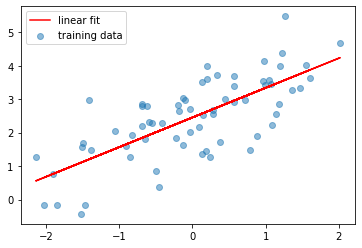

In [ ]:
# Lets plot lpsa vs lcavol using the weight 
xc = train['lcavol']
yc = train['lpsa']
fig, ax = plt.subplots(1,1)
ax.scatter(xc,yc, marker="o", alpha=0.5, label="training data")
ax.plot(xc, final_b[0] +  final_w[0]*xc, '-r', label="linear fit" )
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#results = smf.ols('lpsa ~ lcavol + lweight + age + lbph  + svi + lcp + gleason + pgg45', data=train).fit()
results = smf.ols('lpsa ~ lcavol', data=train).fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     75.55
Date:                Thu, 23 Jun 2022   Prob (F-statistic):           1.73e-12
Time:                        17:07:42   Log-Likelihood:                -81.382
No. Observations:                  67   AIC:                             166.8
Df Residuals:                      65   BIC:                             171.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4523      0.101     24.252      0.0

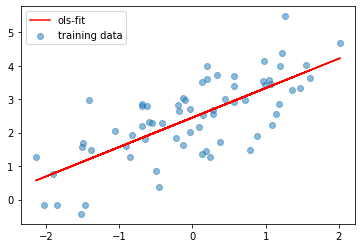

In [ ]:
# Lets plot lpsa vs lcavol using the weight
xc1 = train['lcavol']
yc1 = train['lpsa']

fig, ax = plt.subplots(1,1)
ax.scatter(xc1,yc1, marker="o", alpha=0.5, label="training data")
ax.plot(xc1, 2.45+ 0.88*xc1, "-r", label="ols-fit" )
plt.legend()

plt.show()

# Now we do these in TensorFlow

## I. Get Data and Prepare Pandas DataFrames

In [ ]:
# Dataframes for this project
DATA_URL = "https://hastie.su.domains/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(DATA_URL, sep='\t') 

TARGET = ['lpsa']
NUMERICAL_FEATURES = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
STRING_CATEGORICAL_FEATURES = []
INTEGER_CATEGORICAL_FEATURES = []
ALL_FEATURES = NUMERICAL_FEATURES + STRING_CATEGORICAL_FEATURES + INTEGER_CATEGORICAL_FEATURES
TRAINING_SET_SELECTION = ['train']

def prepare_train_and_test_dataframes(df, features):
  df = df.copy()
  df = df[ALL_FEATURES + TARGET + TRAINING_SET_SELECTION] # this will drop fictitious columns that show up in the downloaded file
  train_df = df[df['train']=='T'].copy() # We will need a validation set for hyperparameters - we omit this step
  test_df = df[df['train'] != 'T'].copy()
  train_df.drop('train',axis=1, inplace=True)
  test_df.drop('train',axis=1, inplace=True)
  train_df.reset_index(drop=True, inplace=True)
  test_df.reset_index(drop=True, inplace=True)

  # Separate X and y
 
  features_plus_target=features+TARGET

  train_df = train_df[features_plus_target]
  test_df = test_df[features_plus_target]
  return train_df, test_df 

train_df, test_df = prepare_train_and_test_dataframes(df, features=['lcavol', 'lweight'])
# y_train_df = X_train_df.pop(TARGET[0])
# X_train, y_train = X_train_df.values, y_train_df.values

# y_test_df = X_test_df.pop(TARGET[0])
# X_test, y_test = X_test_df.values, y_test_df.values

# # print shapes
# print(f"Training X and y: {X_train.shape}, {y_train.shape}")
# print(f"Test X and y: {X_test.shape}, {y_test.shape}")


##II. Convert DataFrames to Datasets, shuffle and batch

In [ ]:
def convert_df_to_Xyds(df, target, shuffle=True, batch_size=16):
  df = df.copy()
  y_df = df.pop(target) # now df is X_df only
  ds = tf.data.Dataset.from_tensor_slices((dict(df), y_df)) # Keep the column names as keys
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df))
  ds = ds.batch(batch_size)
  return ds
#-----------------------
train_ds = convert_df_to_Xyds(train_df, target=TARGET[0], shuffle=True, batch_size=16)
test_ds = convert_df_to_Xyds(test_df, target=TARGET[0], shuffle=True, batch_size=16)


##III. Look inside the datasets created

In [ ]:
if True:
  for feature_batch, target_batch in train_ds.take(1):
    print(f"Features are: {list(feature_batch.keys())}")
    print(f"A batch of lcavol: {feature_batch['lcavol']}" )
    print(f"A batch of lweight: {feature_batch['lweight']}")
    print(f"A batch of targets: {target_batch}")

# Another way to look into dataset
from tensorflow import feature_column
if True:
  
  one_batch = next(iter(train_ds))[0]
  def processing(feature_column):
    feature_layer = tf.keras.layers.DenseFeatures(feature_column)
    print(f"one batch of the feature column:\n{feature_layer(one_batch).numpy()}")

  #------------------
  lcavol_column = feature_column.numeric_column('lcavol')
  processing(lcavol_column)


Features are: ['lcavol', 'lweight']
A batch of lcavol: [ 1.99741771  2.05923883  1.20597081  1.44691898  0.3852624   0.97455964
 -0.40047757  1.77155676  0.51282363  0.00995033  0.18232156  1.45861502
  2.07317193  3.47196645  0.22314355  2.7794402 ]
A batch of lweight: [3.719651 3.501043 3.442019 3.124565 3.6674   2.865054 3.865979 3.896909
 3.633631 3.267666 3.804438 3.836221 3.623007 3.974998 3.244544 3.823192]
A batch of targets: [2.8535925 1.6582281 1.3987169 1.7664417 1.7316555 2.7880929 1.8164521
 2.3749058 2.6844403 2.0215476 2.008214  2.8875901 2.8820035 5.5829322
 1.047319  3.5130369]
one batch of the feature column:
[[ 1.3083328 ]
 [-0.40047756]
 [ 0.00995033]
 [ 1.22083   ]
 [ 1.2149128 ]
 [ 3.4719665 ]
 [ 2.059239  ]
 [ 1.4586151 ]
 [ 0.3852624 ]
 [ 1.442202  ]
 [ 0.18232156]
 [ 2.677591  ]
 [ 1.2059708 ]
 [ 1.446919  ]
 [ 2.0731719 ]
 [ 1.8389611 ]]


## IV. Choose feature columns to use for study

In [ ]:
# We only have numerical features
lcavol = tf.keras.Input(shape=(1,), name="lcavol")
lweight = tf.keras.Input(shape=(1,), name="lweight")
# We need to normalize them

In [ ]:
def encode_numerical_feature(feature, name, dataset):
  """
  from https://keras.io/examples/structured_data/structured_data_classification_from_scratch/
  """
  # Create a Normalization layer for our feature
  normalizer = tf.keras.layers.Normalization()

  # Prepare a Dataset that only yields our feature
  feature_ds = dataset.map(lambda x, y: x[name])
  feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

  # Learn the statistics of the data
  normalizer.adapt(feature_ds)

  # Normalize the input feature
  encoded_feature = normalizer(feature)
  return encoded_feature

In [ ]:
inputs = [lcavol, lweight]
# Normalize numerical features and learn their statistics
lcavol_encoded = encode_numerical_feature(lcavol, "lcavol", train_ds)
lweight_encoded = encode_numerical_feature(lweight, "lweight", train_ds)
# Processing layers
output_of_processing_layers = tf.keras.layers.concatenate(
  [ lcavol_encoded, lweight_encoded,] )


In [ ]:
output = tf.keras.layers.Dense(1, activation="linear")(output_of_processing_layers)
model = tf.keras.Model(inputs, output)
model.compile("adam", "mean_squared_error", metrics=["mean_squared_error"])

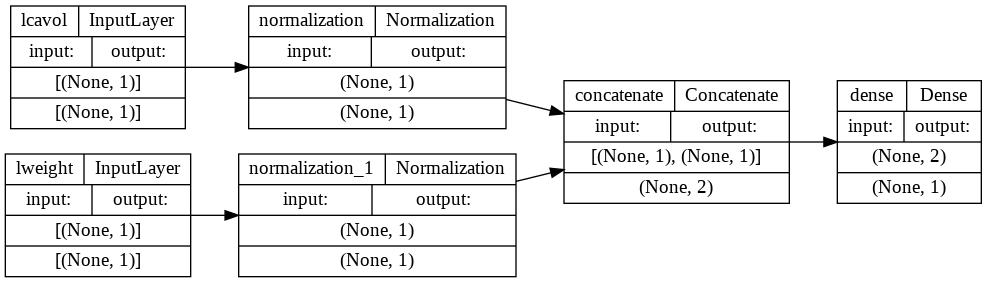

In [ ]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lcavol (InputLayer)            [(None, 1)]          0           []                               
                                                                                                  
 lweight (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 1)            3           ['lcavol[0][0]']                 
                                                                                                  
 normalization_1 (Normalization  (None, 1)           3           ['lweight[0][0]']                
 )                                                                                            

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.7364425 ],
       [0.08946275]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.5374954], dtype=float32)>]


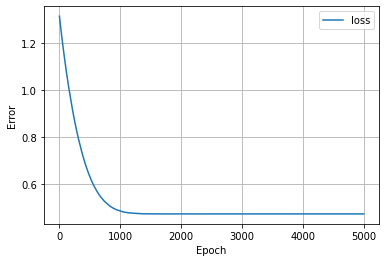

In [ ]:
model.fit(train_ds, epochs=5000, verbose=0)
print(model.trainable_weights)
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(model.history)

# Learning on All Features provided in data
## Use feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
### where feature_columns is a list of feature columns constructed using feature_column() from tensorflow import feature_column

Index(['lcavol', 'lweight', 'lpsa'], dtype='object')

In [ ]:
# Complete model using all eight features of train_features_ds.

#The Normalization layer will build preprocessing in the model itself
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features_ds)) # this will get the data it needs from training data
linear_regression_model = tf.keras.Sequential([
    normalizer,             # normalization layer
    layers.Dense(units=1)   # linear regression layer - one neuron only
])
linear_regression_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 26
Trainable params: 9
Non-trainable params: 17
_________________________________________________________________


In [ ]:
#Consts
EPOCHS=100
VALIDATION_FRAC=0.2
LEARNING_RATE=0.01
OPTIMIZER=tf.optimizers.Adam(learning_rate=LEARNING_RATE)
LOSS='mean_absolute_error'
# compile and fit
linear_regression_model.compile(
    optimizer=OPTIMIZER,
    loss=LOSS)
%time
history = linear_regression_model.fit(
    train_features_ds, train_labels_ds,
    epochs=EPOCHS,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = VALIDATION_FRAC)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())
print(f"Bias = {linear_regression_model.layers[1].bias.numpy()}")
print(f"Weights = {linear_regression_model.layers[1].kernel.numpy()}")

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs
    loss  val_loss  epoch
95  0.69      2.86     95
96  0.68      2.83     96
97  0.68      2.80     97
98  0.67      2.77     98
99  0.67      2.74     99
Bias = [1.5466807]
Weights = [[ 0.40165478]
 [ 0.21239051]
 [ 0.02613369]
 [ 0.4010769 ]
 [-0.79943436]
 [ 0.07687116]
 [ 0.20784199]
 [ 0.02269111]]


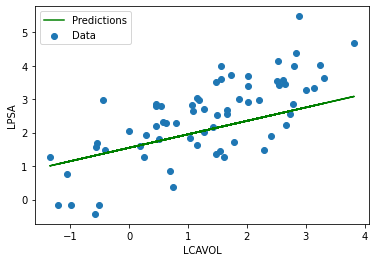

In [ ]:
def plot_model(x, y):
  plt.scatter(x, y, label='Data')
  plt.plot(x, linear_regression_model.layers[1].bias.numpy()[0] + 
           linear_regression_model.layers[1].kernel.numpy()[0,0]*x, color='g', label='Predictions')
  plt.xlabel('LCAVOL')
  plt.ylabel('LPSA')
  plt.legend()
plot_model(train_features_ds['lcavol'], train_labels_ds)